# $t$ distribution
Author: Aleksander Filip Żarnecki (University of Warsaw)

### (0) Import libraries 

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt

from scipy.stats import norm
from scipy.stats import t

### (1) Define $t$ experiment

Use standard normal distribution ($\mu=0$, $\sigma=1$) for simplicity


In [2]:
def myt(npt,nmc=1):
    mes = np.random.normal(size=(npt,nmc))
    mean = np.mean(mes,axis=0)
    dm = mes - mean
    sigma = np.sqrt(np.sum(dm*dm,axis=0)/(npt-1)/npt)
    
    return mean/sigma

### (2) Run multiple experiments

In [12]:
# Number of measurement sequences

Ntry = 100000

# Number of measurements in one sequence

Nmes = 8

# Table to collect results

tvec = myt(Nmes,Ntry)
    

### (3) Plot results

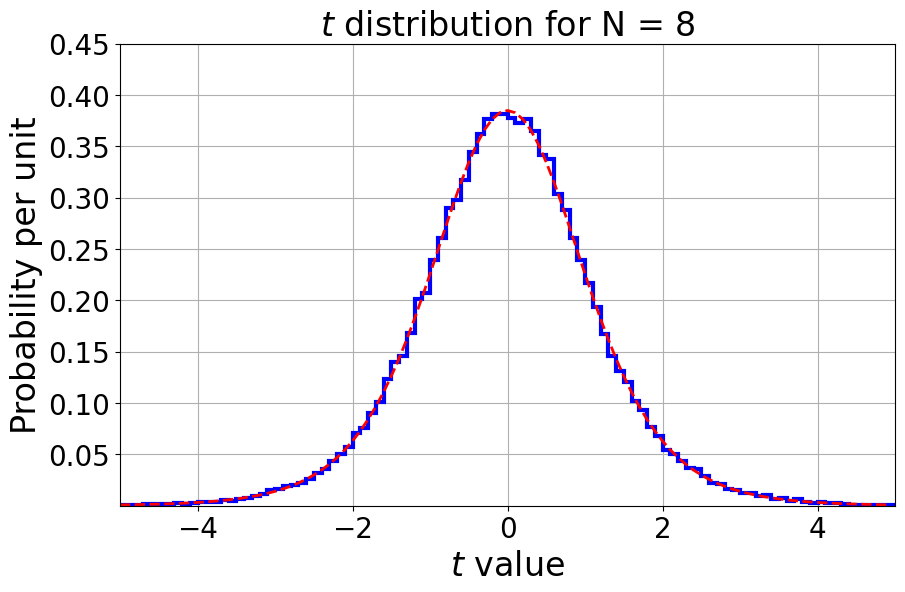

In [13]:
Xmin = -5.0
Xmax = 5.0
Nbin = 100

# Plot histogram

plt.figure(figsize=(10, 6))

# Need to use proper weights to take tails into account (density=True does not include tails!)

wvec = Nbin/Ntry/(Xmax-Xmin)*np.ones(Ntry)
plt.hist(tvec,bins=Nbin, range=[Xmin,Xmax], weights=wvec,
         density=False, log=False, histtype='step',linewidth=3,color='blue')

plt.title("$t$ distribution for N = "+str(Nmes),size=24)
plt.xlabel('$t$ value',size=24)
plt.ylabel('Probability per unit',size=24)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlim([Xmin,Xmax])
plt.ylim([0.0001,0.45])
plt.grid(which='major', axis='both')

# Add expected distribution (scipy function)


xvec = np.arange(Xmin,Xmax,0.1)
fvec = t.pdf(xvec,Nmes-1)

plt.plot(xvec,fvec,'r--',linewidth=2)

fname = '08_t-dist2_'+str(Nmes)+'.png'
plt.savefig(fname)

plt.show()

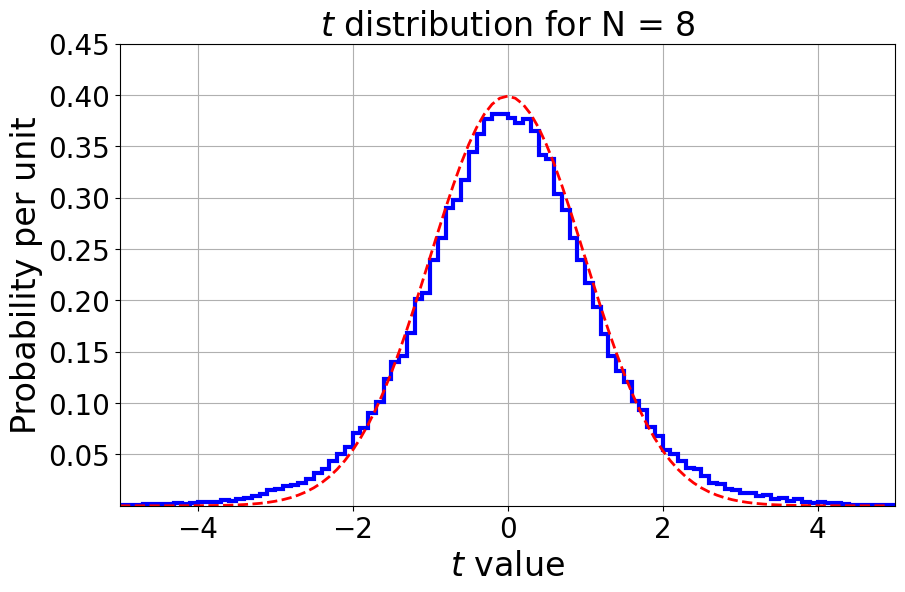

In [14]:
Xmin = -5.0
Xmax = 5.0
Nbin = 100

# Plot histogram

plt.figure(figsize=(10, 6))

plt.hist(tvec,bins=Nbin, range=[Xmin,Xmax], weights=wvec,
         density=False, log=False, histtype='step',linewidth=3,color='blue')

plt.title("$t$ distribution for N = "+str(Nmes),size=24)
plt.xlabel('$t$ value',size=24)
plt.ylabel('Probability per unit',size=24)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlim([Xmin,Xmax])
plt.ylim([0.0001,0.45])
plt.grid(which='major', axis='both')

# Add expected distribution (scipy function)


gvec = norm.pdf(xvec,0.,1.)

plt.plot(xvec,gvec,'r--',linewidth=2)

fname = '08_t-dist_'+str(Nmes)+'.png'
plt.savefig(fname)

plt.show()